Our first method will use simple counting i.e. count the number of times each character is predicted based on two characters provided e.g. the name jane would defines n as the next characters after 'ja' so that would add to 'n' probability of being the next character 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
%pip install torch torchvision
import torch

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Read in words
words = open('names.txt', 'r').read().splitlines()
words[:10]


['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In this instance, we are only looking at three characters. Two input characters, and the character we are predicting next.

e.g. what characters are likely to follow r

we also now what names are likely to start and finish at


We then do a simple count of most prominent trigrams

How many examples do we get from emma?

<S>e -> m
em -> m
mm -> a
ma -> <E>

In [146]:
t = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>'] # hallucinate a start character and end character 
    for pair, ch2 in zip(zip(chs, chs[1:]), chs[2:]):
        trigram  = (''.join(pair), ch2)
        print(trigram)
        t[trigram ] = t.get(trigram, 0) + 1

<S>e
em
mm
ma
<S>o
ol
li
iv
vi
ia
<S>a
av
va
<S>i
is
sa
ab
be
el
ll
la
<S>s
so
op
ph
hi
ia
<S>c
ch
ha
ar
rl
lo
ot
tt
te
<S>m
mi
ia
<S>a
am
me
el
li
ia
<S>h
ha
ar
rp
pe
er
<S>e
ev
ve
el
ly
yn
<S>a
ab
bi
ig
ga
ai
il
<S>e
em
mi
il
ly
<S>e
el
li
iz
za
ab
be
et
th
<S>m
mi
il
la
<S>e
el
ll
la
<S>a
av
ve
er
ry
<S>s
so
of
fi
ia
<S>c
ca
am
mi
il
la
<S>a
ar
ri
ia
<S>s
sc
ca
ar
rl
le
et
tt
<S>v
vi
ic
ct
to
or
ri
ia
<S>m
ma
ad
di
is
so
on
<S>l
lu
un
na
<S>g
gr
ra
ac
ce
<S>c
ch
hl
lo
oe
<S>p
pe
en
ne
el
lo
op
pe
<S>l
la
ay
yl
la
<S>r
ri
il
le
ey
<S>z
zo
oe
ey
<S>n
no
or
ra
<S>l
li
il
ly
<S>e
el
le
ea
an
no
or
<S>h
ha
an
nn
na
ah
<S>l
li
il
ll
li
ia
an
<S>a
ad
dd
di
is
so
on
<S>a
au
ub
br
re
ey
<S>e
el
ll
li
ie
<S>s
st
te
el
ll
la
<S>n
na
at
ta
al
li
ie
<S>z
zo
oe
<S>l
le
ea
ah
<S>h
ha
az
ze
el
<S>v
vi
io
ol
le
et
<S>a
au
ur
ro
or
ra
<S>s
sa
av
va
an
nn
na
ah
<S>a
au
ud
dr
re
ey
<S>b
br
ro
oo
ok
kl
ly
yn
<S>b
be
el
ll
la
<S>c
cl
la
ai
ir
re
<S>s
sk
ky
yl
la
ar
<S>l
lu
uc
cy
<S>p
pa
ai
is
sl
le
ey
<S

Now lets get the count of each combo and sort. we'll see that ah followed by ending character occurs the

In [251]:
sorted_t = sorted(t.items(), key = lambda kv: -kv[1])
sorted_t

[(('ah', '<E>'), 3428),
 (('na', '<E>'), 3346),
 (('an', '<E>'), 3018),
 (('on', '<E>'), 3006),
 (('<S>m', 'a'), 2906),
 (('<S>j', 'a'), 2510),
 (('<S>k', 'a'), 2508),
 (('en', '<E>'), 2434),
 (('ly', 'n'), 1952),
 (('yn', '<E>'), 1906),
 (('ar', 'i'), 1900),
 (('ia', '<E>'), 1806),
 (('ie', '<E>'), 1716),
 (('an', 'n'), 1650),
 (('el', 'l'), 1644),
 (('an', 'a'), 1608),
 (('ia', 'n'), 1580),
 (('ma', 'r'), 1552),
 (('in', '<E>'), 1532),
 (('el', '<E>'), 1454),
 (('ya', '<E>'), 1432),
 (('an', 'i'), 1406),
 (('<S>d', 'a'), 1400),
 (('la', '<E>'), 1368),
 (('er', '<E>'), 1366),
 (('iy', 'a'), 1338),
 (('la', 'n'), 1294),
 (('<S>b', 'r'), 1292),
 (('nn', 'a'), 1266),
 (('<S>a', 'l'), 1264),
 (('<S>c', 'a'), 1256),
 (('ra', '<E>'), 1254),
 (('ni', '<E>'), 1250),
 (('<S>a', 'n'), 1246),
 (('nn', '<E>'), 1238),
 (('ne', '<E>'), 1214),
 (('ee', '<E>'), 1210),
 (('ey', '<E>'), 1204),
 (('<S>k', 'e'), 1202),
 (('al', 'e'), 1202),
 (('<S>s', 'a'), 1190),
 (('al', 'i'), 1150),
 (('sh', 'a'), 112

Lets convert our trigram to an array. We need to deduce how many rows we have, so it should be all the combinations of characters against our list of 28 chars.

28 characters consist of 26 alphabet characters plus our <S> and <E> characters. So as we can pair same characters together e.g. -> a,a and with the other 27 chars, there is a total of 28*28 combinations -> 784

# Note: To make this easier to map, I am only counting pairs that exist in the data set, which turns out to be 600


In [306]:
pairs = [item[0][0] for item in sorted_t]
unique_pairs = list(set(pairs))
pairs_string_to_integer = {s:i for i,s in enumerate(unique_pairs)}
print(pairs_string_to_integer)

{'lw': 0, 'lh': 1, 'tm': 2, 'hj': 3, 'eu': 4, 'nv': 5, 'mc': 6, 'lt': 7, 'ra': 8, 'un': 9, 'hb': 10, 'ek': 11, 'gn': 12, 'iq': 13, 'pm': 14, 'lc': 15, 'ty': 16, 'qs': 17, 'io': 18, 'cq': 19, 'gl': 20, 'mr': 21, 'mb': 22, 'ax': 23, 'sl': 24, 'ti': 25, 'zg': 26, 'cl': 27, 'wk': 28, '<S>t': 29, 'ia': 30, 'mi': 31, 'db': 32, 'ul': 33, 'wg': 34, 'cx': 35, 'lp': 36, 'yk': 37, 'dv': 38, '<S>f': 39, 'so': 40, 'er': 41, 'lb': 42, 'yf': 43, 'oz': 44, '<S>s': 45, 'rl': 46, 'tr': 47, 'wm': 48, 'dz': 49, 'nt': 50, 'hk': 51, 'ju': 52, 'ff': 53, 'hw': 54, 'mw': 55, 'ry': 56, 'iz': 57, 'ng': 58, 'kk': 59, 'oa': 60, 'br': 61, 'rj': 62, 'uo': 63, 'fo': 64, 'ec': 65, 'hz': 66, 'yv': 67, 'wi': 68, 'jb': 69, 'iy': 70, 'vd': 71, 'yr': 72, 'pp': 73, 'yc': 74, 'hs': 75, 'rz': 76, 'ux': 77, 'ze': 78, 'sr': 79, 'de': 80, 'ic': 81, 'hv': 82, 'tf': 83, 'zd': 84, 'rc': 85, 'yl': 86, 'zb': 87, 'ss': 88, 'mt': 89, 'go': 90, 'lm': 91, 'at': 92, 'he': 93, 'ac': 94, 'om': 95, 'nu': 96, 'tn': 97, 'ar': 98, 'dq': 99, 'tl

In [252]:
import torch

N = torch.zeros((len(pairs_string_to_integer), 28), dtype=torch.int32) # 28*28 = 784 for different pair combos
N

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.int32)

We need to create a lookup of integers to pairs so we can have an index. 
Basically we need an integer ref for all our points in our torch, that means each character pair needs an integer value, and each character needs a value e.g. ac = [2000] and if it predicts d as next letter it would be axis point [2000, 3]. Therefore each time this is shown, we add +1, allowing us to count the number of occurences 

If I understand this correctly, we therefore need two integer lookups: 
-
Taking our char pairs as the 'y' axis - we need 0:len(unique-pairs)  i.e. 0-600 and then our single character axis being x axis, we need 28 chars (alphabet including <S> and <E>)

0   |------------------------------28
    |<S>aa   <S>ab  <S>ac
    |aaa     aab    aac
    |..
    |..
    |..
600 |zaa zab

Lets get the character string to integer index for our 'y-axis'

In [303]:
# returns all the set of lowercase characters
chars = sorted(set(''.join(words)))
pred_string_to_integer = {s:i for i,s in enumerate(chars)}
pred_string_to_integer['<S>'] = 26
pred_string_to_integer['<E>'] = 27
print(pred_string_to_integer)

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25, '<S>': 26, '<E>': 27}


Now lets store our counts in a tensor

In [266]:
for w in words:
    chs = ['<S>'] + list(w) + ['<E>'] # hallucinate a start character and end character 
    for pair, ch2 in zip(zip(chs, chs[1:]), chs[2:]):
        trigram  = (''.join(pair), ch2)
        pairs_combined = trigram[0]
        ix1 = pairs_string_to_integer[pairs_combined]
        ix2 = pred_string_to_integer[ch2]
        N[ix1, ix2] += 1
        

368 12
426 12
109 0
211 27
318 11
578 8
202 21
440 8
317 0
30 27
420 21
239 0
497 27
526 18
571 0
200 1
581 4
140 11
436 11
481 0
171 27
45 14
40 15
116 7
554 8
271 0
30 27
231 7
411 0
240 17
98 11
46 14
528 19
168 19
512 4
574 27
576 8
31 0
30 27
420 12
189 4
268 11
436 8
202 0
30 27
456 0
240 17
98 15
479 4
508 17
41 27
368 21
362 4
530 11
436 24
261 13
475 27
420 1
581 8
521 6
155 0
233 8
549 11
531 27
368 12
426 8
31 11
531 24
261 27
368 11
436 8
202 25
57 0
437 1
581 4
140 19
254 7
311 27
576 8
31 11
531 0
171 27
368 11
436 11
481 0
171 27
420 21
239 4
530 17
41 24
56 27
45 14
40 5
377 8
219 0
30 27
231 0
452 12
189 8
31 11
531 0
171 27
420 17
98 8
243 0
30 27
45 2
329 0
452 17
98 11
46 4
349 19
254 19
512 27
110 8
317 2
81 19
535 14
450 17
256 8
243 0
30 27
576 0
211 3
523 8
237 18
571 14
40 13
108 27
357 20
447 13
9 0
579 27
345 17
130 0
8 2
94 4
312 27
231 7
411 11
143 14
528 4
223 27
511 4
508 13
232 4
522 11
436 14
528 15
116 4
508 27
357 0
171 24
198 11
86 0
171 27
471 8
243

In [267]:
%pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.


Create an inverse of string to integer

In [270]:
pred_itos = {i:s for s,i in pred_string_to_integer.items()}
pred_itos
pair_itos = {i:s for s,i in pairs_string_to_integer.items()}
pair_itos

{0: 'lw',
 1: 'lh',
 2: 'tm',
 3: 'hj',
 4: 'eu',
 5: 'nv',
 6: 'mc',
 7: 'lt',
 8: 'ra',
 9: 'un',
 10: 'hb',
 11: 'ek',
 12: 'gn',
 13: 'iq',
 14: 'pm',
 15: 'lc',
 16: 'ty',
 17: 'qs',
 18: 'io',
 19: 'cq',
 20: 'gl',
 21: 'mr',
 22: 'mb',
 23: 'ax',
 24: 'sl',
 25: 'ti',
 26: 'zg',
 27: 'cl',
 28: 'wk',
 29: '<S>t',
 30: 'ia',
 31: 'mi',
 32: 'db',
 33: 'ul',
 34: 'wg',
 35: 'cx',
 36: 'lp',
 37: 'yk',
 38: 'dv',
 39: '<S>f',
 40: 'so',
 41: 'er',
 42: 'lb',
 43: 'yf',
 44: 'oz',
 45: '<S>s',
 46: 'rl',
 47: 'tr',
 48: 'wm',
 49: 'dz',
 50: 'nt',
 51: 'hk',
 52: 'ju',
 53: 'ff',
 54: 'hw',
 55: 'mw',
 56: 'ry',
 57: 'iz',
 58: 'ng',
 59: 'kk',
 60: 'oa',
 61: 'br',
 62: 'rj',
 63: 'uo',
 64: 'fo',
 65: 'ec',
 66: 'hz',
 67: 'yv',
 68: 'wi',
 69: 'jb',
 70: 'iy',
 71: 'vd',
 72: 'yr',
 73: 'pp',
 74: 'yc',
 75: 'hs',
 76: 'rz',
 77: 'ux',
 78: 'ze',
 79: 'sr',
 80: 'de',
 81: 'ic',
 82: 'hv',
 83: 'tf',
 84: 'zd',
 85: 'rc',
 86: 'yl',
 87: 'zb',
 88: 'ss',
 89: 'mt',
 90: 'go',
 91

tensor(10, dtype=torch.int32)

(-0.5, 27.5, 783.5, -0.5)

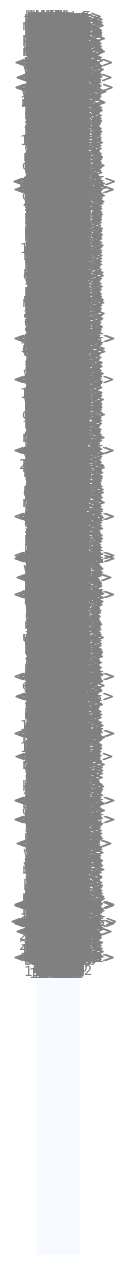

In [269]:
# To do: FIX THIS
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(len(pair_itos)):
    for j in range(len(pred_itos)):
        chstr = pair_itos[i] + pred_itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis('off')

In [182]:
N[0]

tensor([30,  0,  0,  0, 10,  0,  0,  0, 15,  0,  0,  0,  0,  0, 10,  0,  0,  0,
         0,  0,  0,  0,  0,  0, 15,  0,  0,  0], dtype=torch.int32)

Now lets convert to probabilitiess. Gives us the probability of any character being the first character of a name. 

In [292]:
P = (N+0.1).float()  
P /=  P.sum(1, keepdims=True)
P[0]

tensor([0.3477, 0.0029, 0.0029, 0.0029, 0.1178, 0.0029, 0.0029, 0.0029, 0.1753,
        0.0029, 0.0029, 0.0029, 0.0029, 0.0029, 0.1178, 0.0029, 0.0029, 0.0029,
        0.0029, 0.0029, 0.0029, 0.0029, 0.0029, 0.0029, 0.1753, 0.0029, 0.0029,
        0.0029])

For sampling we will use torch.multinomial and a generator object to make everything deterministic 

This line of code is using PyTorch, a popular machine learning library in Python. 

The `torch.Generator()` is an object that holds the state of the random number generator. You can think of it as a container for the algorithm that produces pseudo-random numbers.

The `manual_seed()` function is used to set the seed for generating random numbers. This ensures that the random numbers generated are deterministic, meaning if you use the same seed, you will get the same sequence of random numbers. This is useful for debugging and testing purposes, as it allows for reproducibility in your code.

In [293]:
g = torch.Generator().manual_seed(214743647)

Logic -> We predict the 3rd character from the beginning two e.g. em -> a. 
We then strip the first character and append our 3rd character for the next prediction i.e. ma -> b

- Starting off the prediction, we need to start on <S>(x) character

In [308]:
gb

TypeError: argument of type 'int' is not iterable

In [329]:
start_chars = []
for key, value in pair_itos.items():
    if '<S>' in str(value):
        start_chars.append((key, value))
start_chars

[(0, 'lw'),
 (1, 'lh'),
 (7, 'lt'),
 (15, 'lc'),
 (20, 'gl'),
 (24, 'sl'),
 (27, 'cl'),
 (33, 'ul'),
 (36, 'lp'),
 (42, 'lb'),
 (46, 'rl'),
 (86, 'yl'),
 (91, 'lm'),
 (100, 'tl'),
 (120, 'pl'),
 (132, 'nl'),
 (143, 'hl'),
 (171, 'la'),
 (173, 'dl'),
 (202, 'li'),
 (210, 'vl'),
 (261, 'ly'),
 (279, 'ln'),
 (282, 'ls'),
 (292, 'ql'),
 (323, 'lr'),
 (327, 'fl'),
 (348, 'lf'),
 (349, 'le'),
 (357, '<S>l'),
 (381, 'kl'),
 (409, 'bl'),
 (413, 'lv'),
 (414, 'ml'),
 (436, 'el'),
 (447, 'lu'),
 (448, 'zl'),
 (458, 'lk'),
 (462, 'ld'),
 (467, 'xl'),
 (481, 'll'),
 (486, 'lq'),
 (503, 'al'),
 (517, 'lj'),
 (524, 'wl'),
 (528, 'lo'),
 (531, 'il'),
 (546, 'lg'),
 (552, 'jl'),
 (578, 'ol'),
 (596, 'lz')]

In [311]:
g = torch.Generator().manual_seed(214748347)
pred_itos

print
for i in range(10):
    out = []
    ix = 0 
    while True:
        p = N[ix].float()
        p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(pred_itos[ix])
        if ix == 27:
            break
    print(''.join(out))

ayyenraoaaaayimes<E>
in<E>
ayebaaesnuepes<E>
oaelaenuaii<E>
aaaihoaoayelkyerayelstus<E>
esraye<E>
ayaayenuem<E>
ibe<E>
oaoaoai<E>
ai<E>


In [301]:
print(pred_itos)

{0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g', 7: 'h', 8: 'i', 9: 'j', 10: 'k', 11: 'l', 12: 'm', 13: 'n', 14: 'o', 15: 'p', 16: 'q', 17: 'r', 18: 's', 19: 't', 20: 'u', 21: 'v', 22: 'w', 23: 'x', 24: 'y', 25: 'z', 26: '<S>', 27: '<E>'}
